In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from bosonic_codes.GKPCode import SquareGKPCode
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7127815319016468793, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4447668641871510909
 physical_device_desc: "device: XLA_CPU device"]

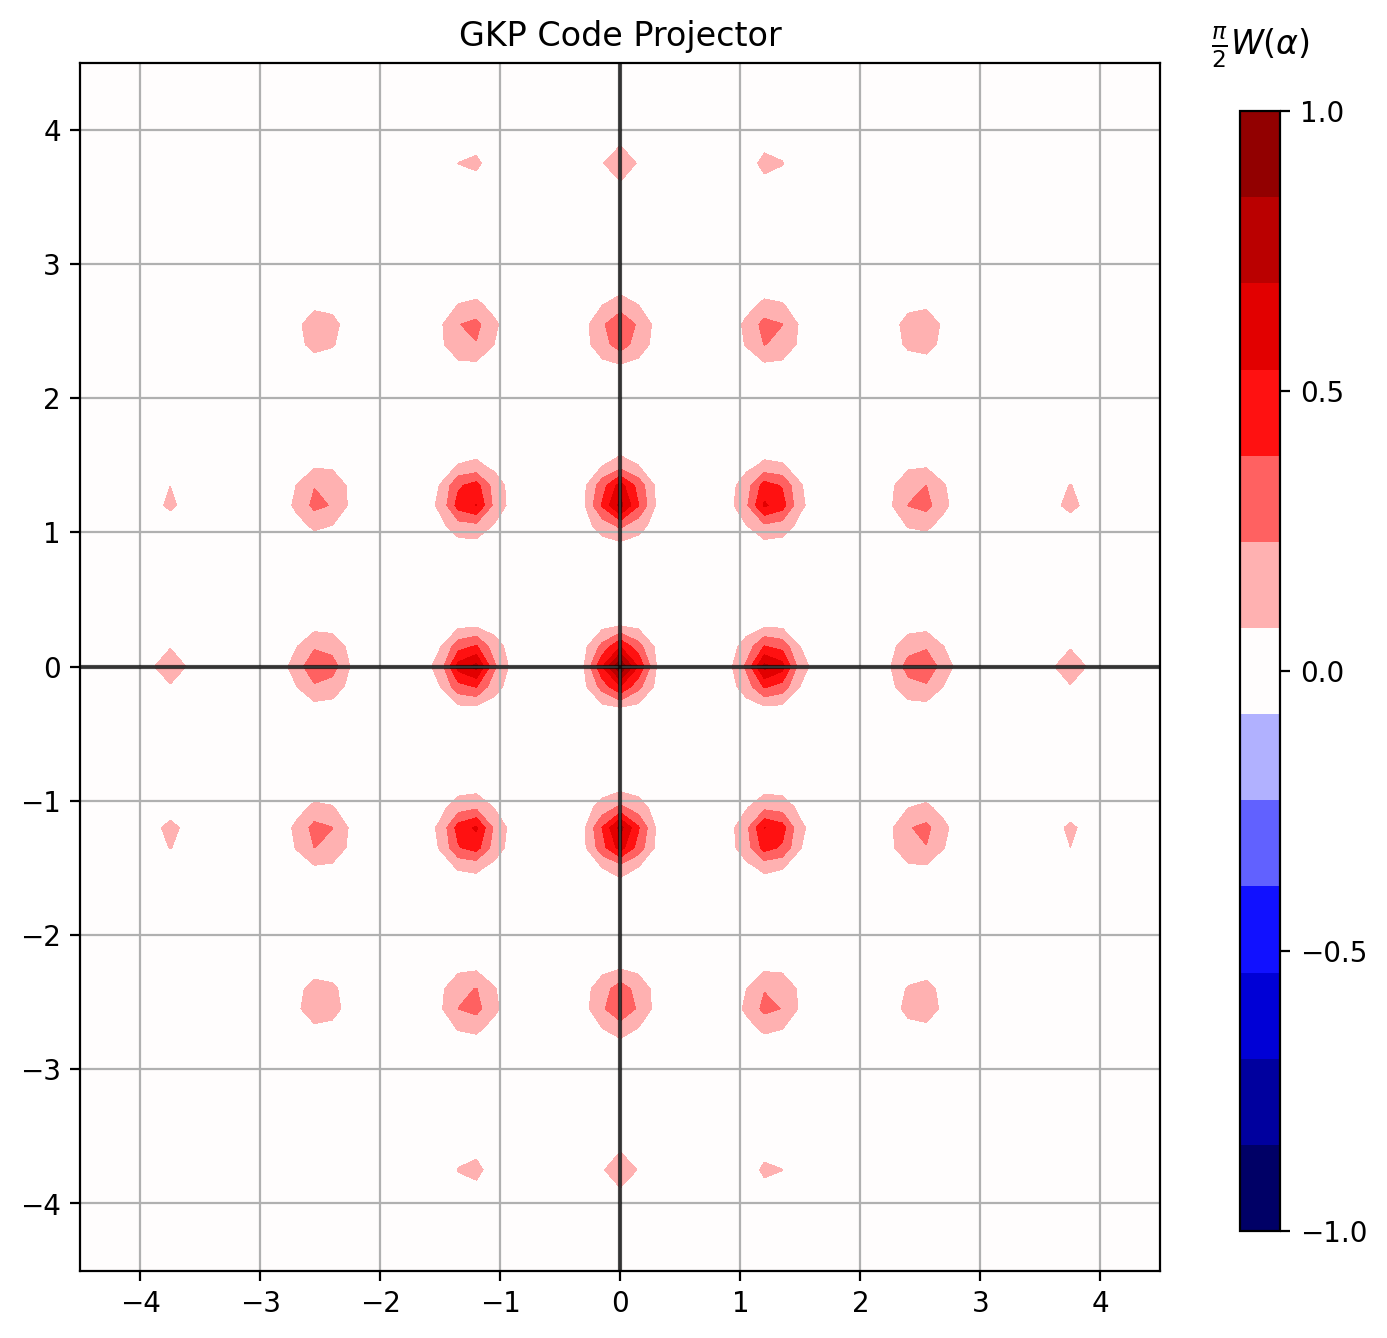

In [2]:
#first, the optimization options.
N =150
delta = 0.25
GKP_target = SquareGKPCode(delta=delta, N=N)
target_state = GKP_target.minusz()
GKP_target.plot_mixed_wigner()

In [11]:
a = np.arange(11)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
b = np.array([3,6])
b

array([3, 6])

In [15]:
np.split(a, b)

[array([0, 1, 2]), array([3, 4, 5]), array([ 6,  7,  8,  9, 10])]

In [20]:
not 0

True

In [3]:
#first, the optimization options.
params = {
'N_blocks' : 16, #number of blocks in circuit
'N_multistart' : 30, #number of optimizations to run in parallel
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.999, #terminal fidelitiy
'use_displacements' : False, #use D operators in optimization
'no_CD_end' : False, #set final CD = 0
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'alpha_scale' : 0.5, #maximum |alpha| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))],
'target_states' : [qt.tensor(qt.basis(2,1), target_state)],
'name' : 'GKP minus z', #name for printing and saving
'filename' : None, 
#if no filename specified, will be saved in this folder with default name #"name.h5" 
'delta' : delta, #note: can pass arbitrary parameters, will be saved
}


In [4]:
#create optimization object. 
#Note that initial params will be randomized upon creation
opt = BatchOptimizer(**params)

In [6]:
#print current info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 30
N_blocks: 16
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: GKP minus z
comment: 
delta: 0.25
N_cav: 150
filename: GKP minus z.h5

Best circuit parameters found:
betas:         [-0.40875-0.1438j   1.81332-2.05471j -0.42349-0.23512j  0.26882-0.02731j
 -0.69271-0.56098j  0.20538-0.16431j -1.76266+1.18055j  0.9796 +1.27468j
 -0.34247-0.01408j  1.37598-1.66115j  0.49794+1.33351j  0.90736+0.18717j
  1.65934-1.40126j -0.15746-0.18859j  1.69157+2.10184j  0.79616+0.68046j]
alphas:        [0.+0.j]
phis (deg):    [   0.      -131.878    -37.26145  -19.53257 -148.17323  178.43433
  -67.78086 -161.87115  -28.04206  173.45941  -48.5308   151.66823
  -10.40694    5.93783  -67.84134  -15.75751]
thetas (deg):  [  -8.21875  109.85603  121.88195   13.29601  150.24655 -169.14972
  -78.84165 -111.98701  104.60793  155.73564 -142.9091    72.605

In [7]:
#run optimizer.
opt.optimize()
#note that every time an optimizer is run, it will add to the same .h5 file in the filename, saving the data with a new timestamp

Start time: 2021-01-25 15:49:37
 Epoch: 200 / 200 Max Fid: 0.992184 Avg Fid: 0.962387 Max dFid: 0.000548 Avg dFid: 0.000035 Elapsed time: 2:22:36.456491 Remaing time: 0:00:00

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 30
N_blocks: 16
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: GKP minus z
comment: 
delta: 0.25
N_cav: 150
filename: GKP minus z.h5

Best circuit parameters found:
betas:         [ 0.36081+2.88587j -0.47285-2.83021j  0.15586+0.56464j  0.95822+1.54416j
  1.01078+3.0289j   2.72704-0.23241j -1.29173-1.35949j -1.28423-0.1793j
  1.12621+0.59847j -0.05536+0.79216j  2.52151+0.94728j  0.1228 -0.2196j
 -0.25237+1.65605j -0.18903+2.87012j -1.26413-0.69698j -0.0084 -0.0254j ]
alphas:        [0.+0.j]
phis (deg):    [  0.       91.4057   86.93297 -86.53929 -92.56094  93.97762  8

'2021-01-25 15:49:37'

In [8]:
#now, we can analyze the results.
#note that all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I would recommend using "HDFview" software to understand data structure
filename = opt.filename
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 16
N_cav: 150
N_multistart: 30
alpha_scale: 0.5
beta_scale: 3.0
comment: 
delta: 0.25
dfid_stop: 1e-06
elapsed_time_s: 8556.456491231918
epoch_size: 10
epochs: 200
learning_rate: 0.01
name: GKP minus z
no_CD_end: False
optimization_type: state transfer
term_fid: 0.999
termination_reason: epochs
use_displacements: False
filename: GKP minus z.h5

Best circuit parameters found:
betas:         [ 0.36081+2.88587j -0.47285-2.83021j  0.15586+0.56464j  0.95822+1.54416j
  1.01078+3.0289j   2.72704-0.23241j -1.29173-1.35949j -1.28423-0.1793j
  1.12621+0.59847j -0.05536+0.79216j  2.52151+0.94728j  0.1228 -0.2196j
 -0.25237+1.65605j -0.18903+2.87012j -1.26413-0.69698j -0.0084 -0.0254j ]
alphas:        [0.+0.j]
phis (deg):    [  0.       91.4057   86.93297 -86.53929 -92.56094  93.97762  82.1608
 -80.80041  82.44302 -83.79958 -95.49742  92.17931 -92.35245  92.71989
  88.13181   3.4923 ]
thetas (deg):  [  89.91489  113.45795  -96.4417    65.19843  -68.94201  -75.23971
  114.88661 -114.87862

In [9]:
#saving the pulse for the experiment
bc = opt.best_circuit()
print(bc)
betas, alphas, phis, thetas = bc['betas'], bc['alphas'], bc['phis'], bc['thetas']
fname = r'Z:\Data\Tennessee2020\20201201_cooldown\conditional_displacement_circuits\20210125_GKP_delta_0p25.npz'
print(fname)
np.savez(fname, betas=betas, phis=phis, thetas=thetas)

{'fidelity': 0.9921841, 'betas': array([ 0.3608119 +2.8858652j , -0.47285375-2.830215j  ,
        0.15585671+0.56463844j,  0.95821834+1.544158j  ,
        1.0107758 +3.028899j  ,  2.7270403 -0.23240738j,
       -1.2917297 -1.3594872j , -1.2842344 -0.17930426j,
        1.1262065 +0.59846824j, -0.05535801+0.79215574j,
        2.5215113 +0.9472764j ,  0.12280013-0.21960293j,
       -0.2523715 +1.6560547j , -0.18902849+2.870118j  ,
       -1.2641305 -0.6969758j , -0.00839677-0.02540178j], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.        ,  1.5953305 ,  1.5172665 , -1.5103956 , -1.615493  ,
        1.640219  ,  1.4339764 , -1.4102331 ,  1.4389021 , -1.4625785 ,
       -1.6667445 ,  1.6088326 , -1.6118544 ,  1.6182673 ,  1.5381901 ,
        0.06095219], dtype=float32), 'thetas': array([ 1.5693109 ,  1.9802148 , -1.6832252 ,  1.1379273 , -1.2032651 ,
       -1.3131807 ,  2.0051496 , -2.0050101 ,  0.44246674,  0.3114798 ,
       -1.7905667 , -1.3361747 , 

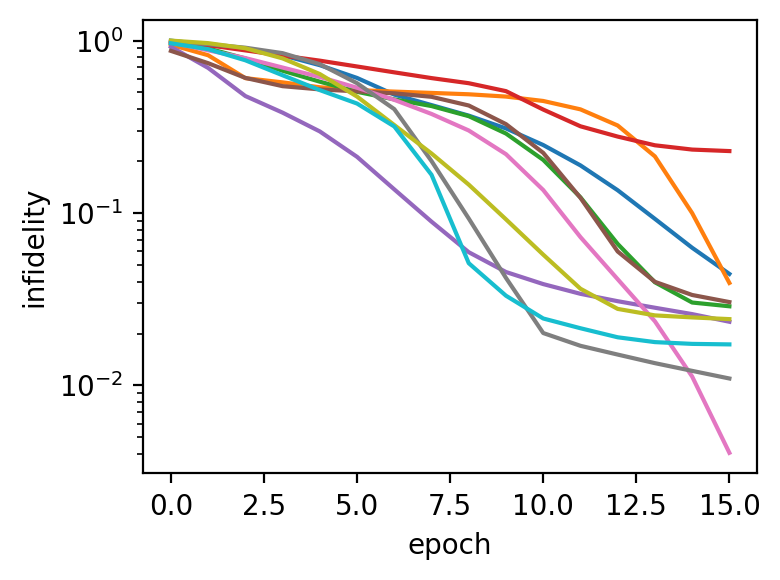

In [7]:
#We can plot the trajectories of the different parallel optimizations
analysis.plot_fidelities()

In [8]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
best_circuit = analysis.best_circuit()
print(best_circuit)
target_state = analysis.target_state()
print(target_state)

{'fidelity': 0.99593514, 'betas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'alphas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'phis': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'thetas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64)}
Quantum object: dims = [[2, 50], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[ 1.16083086e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.46249408e-01+3.28332

In [ ]:
#Now, using the same opt object, we can sweep the number of blocks in the optimization.
sweeper = OptimizationSweeps(opt_object=opt)
sweeper.N_blocks_sweep(min_N_blocks=3, max_N_blocks=6, terminate=True) #"terminate" option specifies if it terminates sweep when term fid is met

In [ ]:
#the sweep data will be nicely saved to the same h5 file. We can analyze the sweep with the sweep analysis class.
sweep_analysis = OptimizationSweepsAnalysis(filename=filename)
sweep_analysis.sweep_names #names of the sweeps it found in the file

In [ ]:
#we can analyze how the best fidelity found depends on the sweep parameter
sweep_analysis.plot_sweep_fidelities(log=False)

In [ ]:
#there are a few other things we can plot. Better data analysis coming soon.
analysis.plot_mag_betas()

In [ ]:
analysis.plot_phase_betas()

In [ ]:
analysis.plot_mag_alphas()

In [ ]:
analysis.plot_phase_alphas()

In [ ]:
analysis.plot_average_magnitude_alpha()

In [ ]:
analysis.plot_average_magnitude_beta()

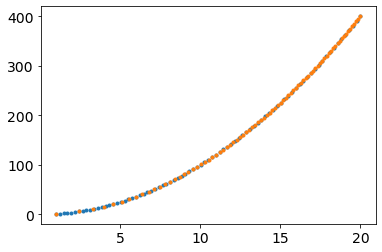

In [15]:
xs = np.linspace(1,20,81)
plt.plot(xs, xs**2, '.')
xs2 = np.sqrt(np.linspace(xs[0]**2, xs[-1]**2, len(xs)))
plt.plot(xs2, xs2**2, '.')